In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Для начала загрузим наши тренировочные данные и проверим, что все нормально загрузилось

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В самом начале решим самый первый вопрос, посмотрим и проанализируем пропущенные значения

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Очень много пропущенных значений в переменной Cabin, далее мы посмотрим насколько это важная информация и уже уберем эту переменную либо заполним её значениями  
Также много пропущенных значений в поле Age, то есть возраст, это уже интуитивно можно понять, что довольно важная переменная, так что мы подумаем, что можно сделать с этим  
И всего 2 пропущенных значения в поле Embarked, либо удалим эти объекты, либо заполним медианным значением

Посмотрим нашу таргетную переменную, насколько у нас сильный дисбаланс классов, между теми, кто выжил и теми, кто нет

<Axes: xlabel='Survived'>

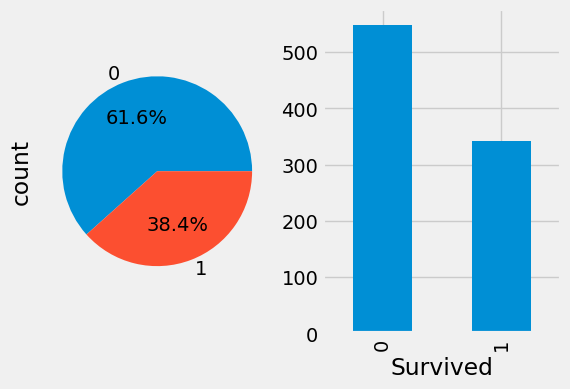

In [4]:
f,ax=plt.subplots(1,2,figsize=(6,4))
df['Survived'].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
df['Survived'].value_counts().plot.bar(ax=ax[1])


Можно увидеть, что погибло ~62% пассажиров или же чуть больше 500 человек, а выжило ~38% или же чуть более 300 человек  
Дисбаланс классов есть, но он не такой прям сильный

<Axes: xlabel='Sex', ylabel='count'>

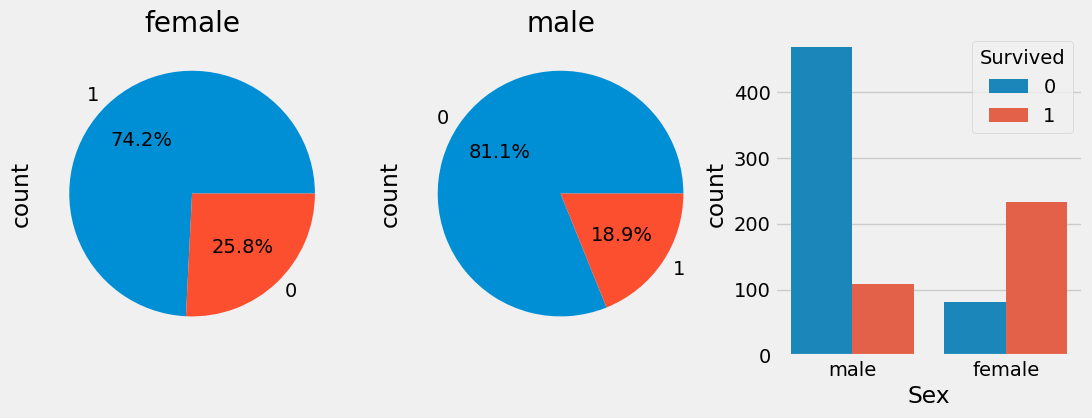

In [5]:
f,ax=plt.subplots(1,3,figsize=(12,4))
df[df["Sex"]== "female"]['Survived'].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%", title = "female")
df[df["Sex"]== "male"]['Survived'].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%", title = 'male')
sns.countplot(x = "Sex", hue = "Survived", data=df, ax= ax[2])

Можно увидеть, что у женщин шанс выжить в разы и разы больше чем у мужчины из любого класса, то есть это одна из самых важных переменных будет  
У нас получается почти 75% женщин выжили, когда в то же время почти 82% мужчин погибли, очень выгодно было быть женщиной, хотя женщин и в целом было меньше, чем мужчин
если брать обую статистику, то женщин спаслось в 2 раза больше чем мужчин

In [6]:
pd.crosstab(df.Pclass, df.Survived).style.background_gradient(cmap="summer")

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: ylabel='count'>

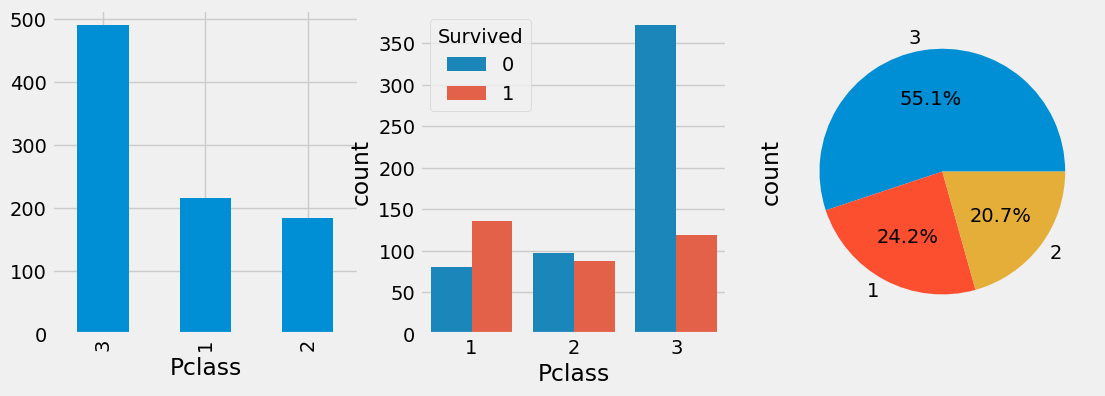

In [7]:
f,ax=plt.subplots(1,3,figsize=(12,4))
df['Pclass'].value_counts().plot.bar(ax = ax[0])
sns.countplot(x = "Pclass", hue = "Survived", data = df, ax=ax[1])
df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%", ax = ax[2])

Также можно увидеть, что больше всего спаслось людей из первого класса, и поигбло там меньше всего, учитывая, что во второй классе было людей процентно даже меньше, чем в 1, то в 1 все равно больше людей спаслось

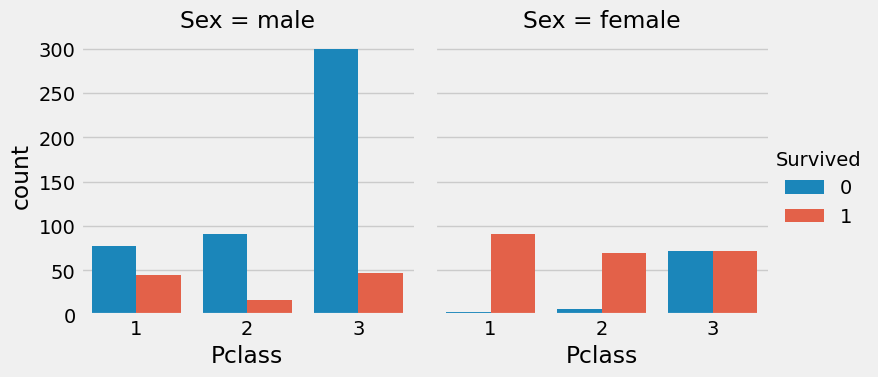

In [8]:
sns.catplot(x="Pclass",hue="Survived",col="Sex",kind="count",data=df,height=4,aspect=1)

И если чуть больше копнуть можно увидеть, что у женщин из 1 класса вероятность выжить почти 100%  
Ниже можно увидеть это на цифрах

In [9]:
pd.crosstab([df.Sex, df.Survived], df.Pclass).style.background_gradient(cmap='summer')

На основе наших графиков мы можем предположить, что класс, тоже очень важная переменная, потому что у женщин уровень выживаемости стремится почти к 100, а мужчины, хоть и все равно не хочешь хорошо выживают, но статистически больше чем в других классах, что в 2, что тем более в 3  

Далее переменная, которую мы рассмотрим это возраст, потому что интуитивно, она тоже будет очень сильно влиять на выживаемость, старики будут иметь процент выживаемости сильно меньше, чем молодые или тем более дети

In [10]:
print(f'Самый старый пассажир: {df['Age'].max()} лет')
print(f'Самый иолодой пассажир: {df['Age'].min()} лет')
print(f'Средний возраст пассажиров: {df['Age'].mean():.1f} лет')

Самый старый пассажир: 80.0 лет
Самый иолодой пассажир: 0.42 лет
Средний возраст пассажиров: 29.7 лет


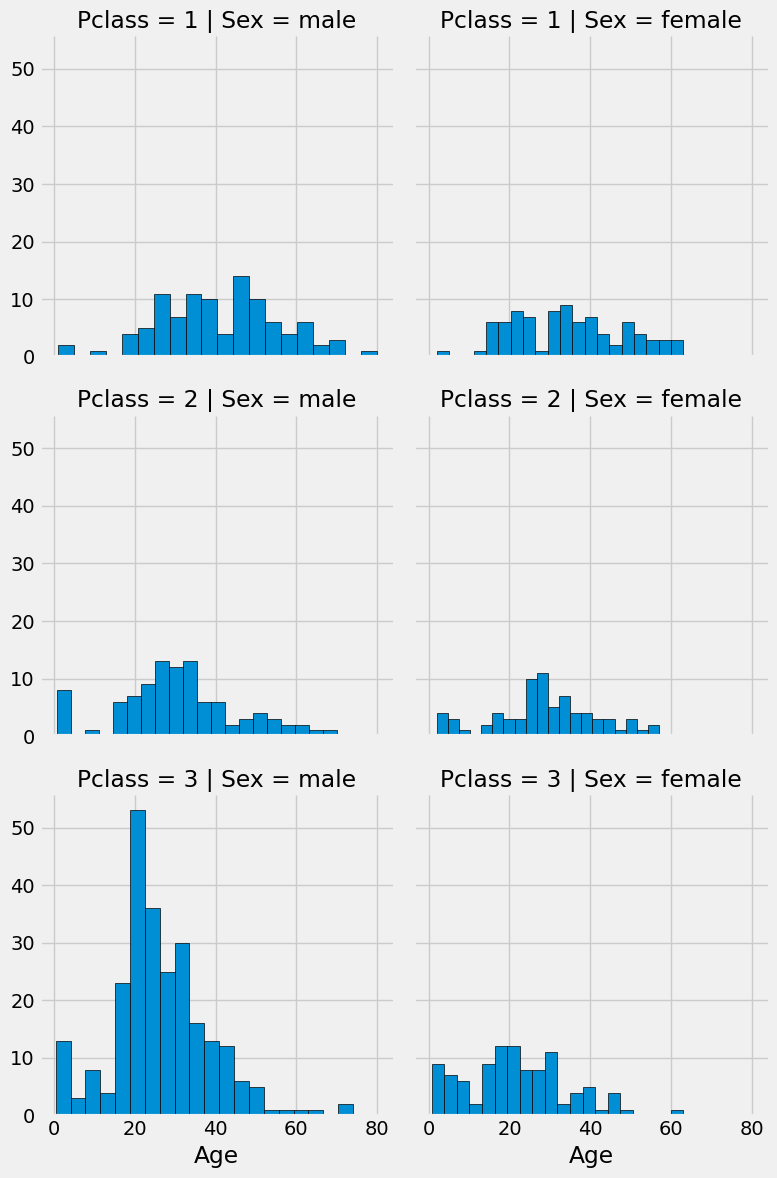

In [11]:
sns.FacetGrid(df, row="Pclass", col='Sex', height=4).map(plt.hist, "Age", bins = 20, edgecolor = "black")

Выше можно посмотреть на распределение по возрасту, видно, что самые старые ехали в 3 классе, а среднее по всем возрастам примерно 30-50 лет

Далее мы будем заполнять пропущенные значения в Age и я подсмотрел в данном контексте очень интересный способ, мы по инициалам будем определять примерный возраст в пропущенных значениях  
Но вообще обычно это делается с помощью mean, mode, median, если вообще прям по простому, если более сложные методы использовать то это KNNImputer, IterativeImputer или просто удаляем значения

In [12]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [13]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Мы можем увидеть, что у каждого инициала есть свой конкретный средний возраст, причем они довольно сильно отличаются  
Master это чаще всего дети, причем такие 0-15 лет  
Miss - Молодые девушки  
Mr - Мужчина средних лет  
Mrs - Женщина средних лет  
Other - это те у кого нет инициалов, скорее всего большинство 3 класс, поэтому средний возраст такой большой, около 46 лет

In [14]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

Далее рассмотрим переменную Embarked, то есть порт в котором сели пассажиры, у нас всего пропущенно 2 значения, так что заполним их просто самым популярным значением

<Axes: xlabel='Embarked'>

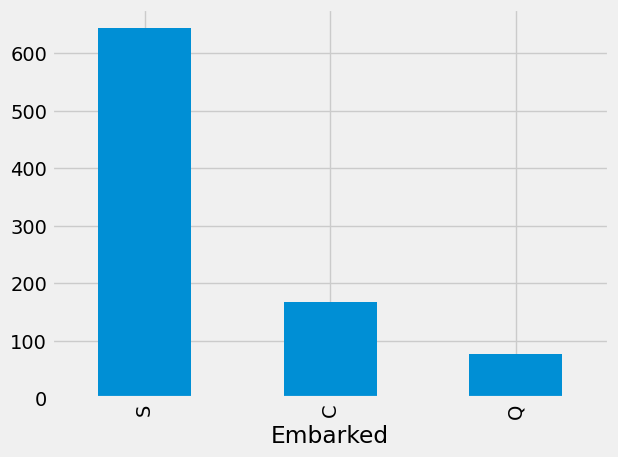

In [16]:
df["Embarked"].value_counts().plot.bar()

In [17]:
df["Embarked"].fillna('S', inplace=True)

И все-таки выкинем ненужные нам переменные, PassengerId она будет только мешаться, модели могут начать привязываться к этой переменной, то же самое относится и к Ticket это случайный номер билета, который по факту ни на что не влиял, модель может начать привязываться к случайным вещам в билете, и фичу Cabin я тоже выкину, потому что во-первых у нас нет 75% информации, да и к тому же я считаю, что это не очень важная информация, потому что скорее всего кабины не было у людей 3 класса, но у нас и так есть информация по классам

In [18]:
df.drop(columns=['Cabin', 'PassengerId', "Ticket", "Name"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Initial   891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Далее рассмотрим сразу две переменные SibSp (Sibling - Сестры, братья, Spouse - Муж, жена), Parch (Родители, дети на борту)  
Я бы просто рассматривал это как семью в общем

In [19]:
pd.crosstab(df.SibSp, df.Survived).style.background_gradient(cmap="summer")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='Survived'>

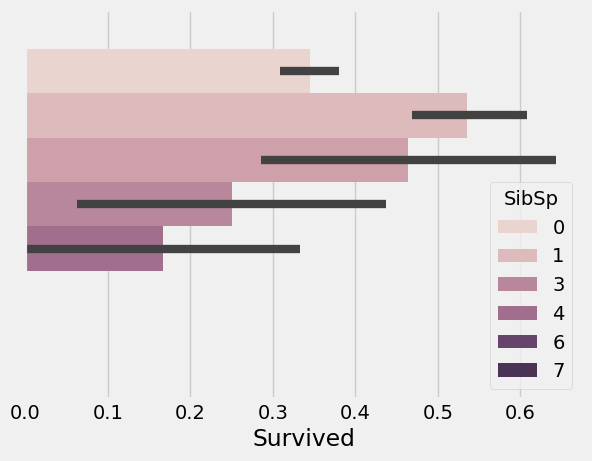

In [20]:
sns.barplot(x = "Survived", hue = "SibSp", data = df)

In [21]:
pd.crosstab(df.Parch, df.Survived).style.background_gradient(cmap="summer")


Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


<Axes: xlabel='Survived'>

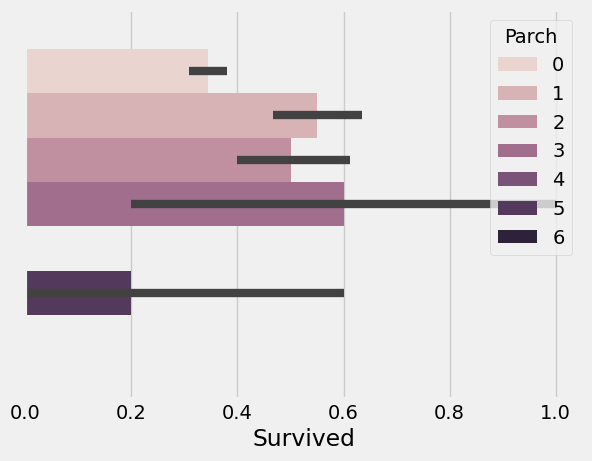

In [22]:
sns.barplot(x = "Survived", hue = "Parch", data = df)

Статистически можно увидеть, что люди, у которых 1 SibSp или 1-4 Parch выживали с большей вероятностью, чем те, кто ехали один, но при этом при 6 Parch выживаемость сильно падала или >2 SibSp

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,22.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [25]:
df_test = pd.read_csv("data/test.csv")
df_test.drop(columns=["PassengerId", "Cabin", "Ticket"], inplace = True)

In [26]:
df_test['Initial']=0
for i in df_test:
    df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'],inplace=True)

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=46

df_test.drop(columns=["Name"], inplace = True)

In [27]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df_test["Sex"] = le.transform(df_test["Sex"])
df['Embarked'] = le.fit_transform(df["Embarked"])
df_test["Embarked"] = le.transform(df_test["Embarked"]) 
df['Initial'] = le.fit_transform(df["Initial"])
df_test["Initial"] = le.transform(df_test["Initial"])

In [28]:
train,test=train_test_split(df,test_size=0.3,random_state=42)

In [29]:
train_x, train_y = train.drop(columns=['Survived']), train["Survived"]
test_x, test_y = test.drop(columns = ["Survived"]), test["Survived"]

In [30]:
model = LogisticRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)

print(f"Точность для логистической регрессии: {metrics.accuracy_score(pred, test_y)}")

Точность для логистической регрессии: 0.8134328358208955


In [31]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

print(f"Точность для ближайших соседей: {metrics.accuracy_score(pred, test_y)}")

Точность для ближайших соседей: 0.7201492537313433


In [32]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

print(f"Точность для решающего дерева: {metrics.accuracy_score(pred, test_y)}")

Точность для решающего дерева: 0.7686567164179104


In [33]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

print(f"Точность для решающего леса: {metrics.accuracy_score(pred, test_y)}")

Точность для решающего леса: 0.7873134328358209


In [34]:
model = XGBClassifier()
model.fit(train_x, train_y)
pred = model.predict(test_x)

print(f"Точность для XGBClassifier: {metrics.accuracy_score(pred, test_y)}")

Точность для XGBClassifier: 0.7910447761194029


In [35]:
from catboost import Pool
cat_features = ['Sex', 'Embarked', 'Initial']
train_pool = Pool(train_x, train_y, cat_features=cat_features)
test_pool = Pool(test_x, cat_features=cat_features)

model = CatBoostClassifier(verbose = 0)

model.fit(train_pool)
train_pred = model.predict(test_pool)



print(f"Точность для CatBoostClassifier: {metrics.accuracy_score(train_pred, test_y)}")

Точность для CatBoostClassifier: 0.8246268656716418


In [36]:
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

print(f"Recall: {recall_score(train_pred,test_y)}")
print(f"Precision: {precision_score(train_pred,test_y)}")
print(f"F1-score: {f1_score(train_pred,test_y)}")

Recall: 0.8555555555555555
Precision: 0.6936936936936937
F1-score: 0.7661691542288557


In [37]:
submission = pd.read_csv('data/gender_submission.csv')
test_df = Pool(df_test, cat_features=cat_features)
test_pred = model.predict(test_df)

In [38]:
submission = pd.DataFrame({
    'PassengerId': submission['PassengerId'],
    'Survived': test_pred
})

In [39]:
#submission.to_csv("submission.csv", index=False)

In [40]:
import shap

In [43]:
cat_explainer = shap.TreeExplainer(
    model, feature_perturbation="tree_path_dependent"
)
cat_shap_values = cat_explainer.shap_values(df_test)

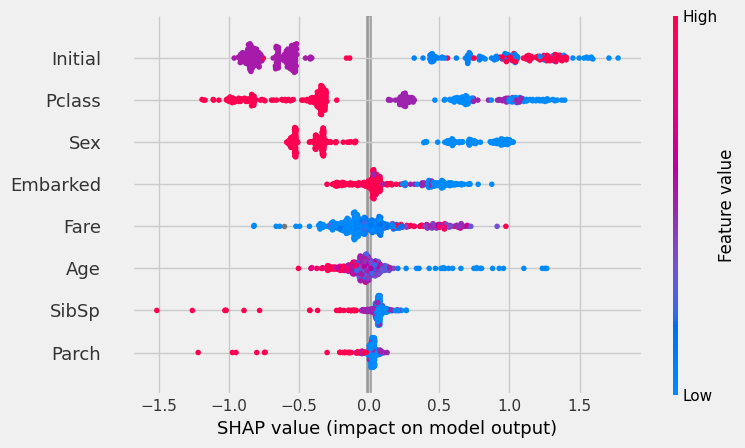

In [44]:

shap.summary_plot(cat_shap_values,df_test )